# Explore here

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Traigo mi set de datos de la url proporcionada y guardo como csv
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=";")
df.to_csv("../data/raw/data.csv", index=False)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Dimensiones del dataframe
df.shape

(41188, 21)

In [4]:
# Obtener información sobre tipos de datos y valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- Existe un total de 41188 datos de usuarios distribuidos en 21 columnas, de entre las que encontramos el objetivo o clase a predecir, y (El cliente contrata o no contrata).
- Ninguna columna presenta valores nulos
- Resumen de variables y tipos de datos:
    - age. Edad del cliente (numérico)
    - job. Tipo de trabajo (categórico)
    - marital. Estado civil (categórico)
    - education. Nivel de educación (categórico)
    - default. ¿Tiene crédito actualmente? (categórico)
    - housing. ¿Tiene un préstamo de vivienda? (categórico)
    - loan. ¿Tiene un préstamo personal? (categórico)
    - contact. Tipo de comunicación de contacto (categórico)
    - month. Último mes en el que se le ha contactado (categórico)
    - day_of_week. Último día en el que se le ha contactado (categórico)
    - duration. Duración del contacto previo en segundos (numérico)
    - campaign. Número de contactos realizados durante esta campaña al cliente (numérico)
    - pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)
    - previous. Número de contactos realizados durante la campaña anterior al cliente (numérico)
    - poutcome. Resultado de la campaña de marketing anterior (categórico)
    - emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)
    - cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)
    - cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico)
    - euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico)
    - nr.employed. Número de empleados. Indicador trimestral (numérico)
    - y. TARGET. El cliente contrata un depósito a largo plazo o no (categórico)

In [5]:
duplicados = df.duplicated().sum()
if duplicados:
    df_unico = df.drop_duplicates()
else:
    df_unico = df

df_unico

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
# SELECCION DE ATRIBUTOS RELEVANTES

print(df_unico["contact"].value_counts())
# Decido eliminar la columna "contact" en mi primer analisis ya que el metodo de llamada al cliente no lo considero relevante
# siendo ademas sus unicos valores "cellular" y "telephone"

print(df_unico["pdays"].value_counts())
# Decido eliminar la columna "pdays" porque tiene un valor practicamente fijo de 999 en la mayoria de los casos

print(df_unico["day_of_week"].value_counts())
# Decido eliminar la columna "day_of_week" de mi analisis por no tener significancia el dia de la semana que se llama al cliente

print(df_unico["default"].value_counts())
# Elimino la columna "default", que aunque parece ser importante, los datos que contiene no son relevantes, entre no y unknown tiene
# casi el 100 % de sus valores

df_unico = df_unico.drop(["contact", "pdays", "day_of_week", "default"], axis=1)
df_unico

contact
cellular     26135
telephone    15041
Name: count, dtype: int64
pdays
999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64
day_of_week
thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: count, dtype: int64
default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64


,age,job,marital,education,housing,loan,month,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,may,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,may,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,may,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,may,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,may,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,nov,334,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,nov,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,yes,no,nov,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,nov,442,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
# ANALISIS DE VARIABLES CATEGORICAS
# ["job", "marital", "education", "housing", "loan", "month", "poutcome", "y"]
print(df_unico["job"].value_counts(), "\n")
print(df_unico["marital"].value_counts(), "\n")
print(df_unico["education"].value_counts(), "\n")
print(df_unico["housing"].value_counts(), "\n")
print(df_unico["loan"].value_counts(), "\n")
print(df_unico["month"].value_counts(), "\n")
print(df_unico["poutcome"].value_counts(), "\n")
print(df_unico["y"].value_counts(), "\n")

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64 

marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64 

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64 

housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64 

loan
no         33938
yes         6248
unknown      990
Name: count, dtype: int64 

month
may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: c

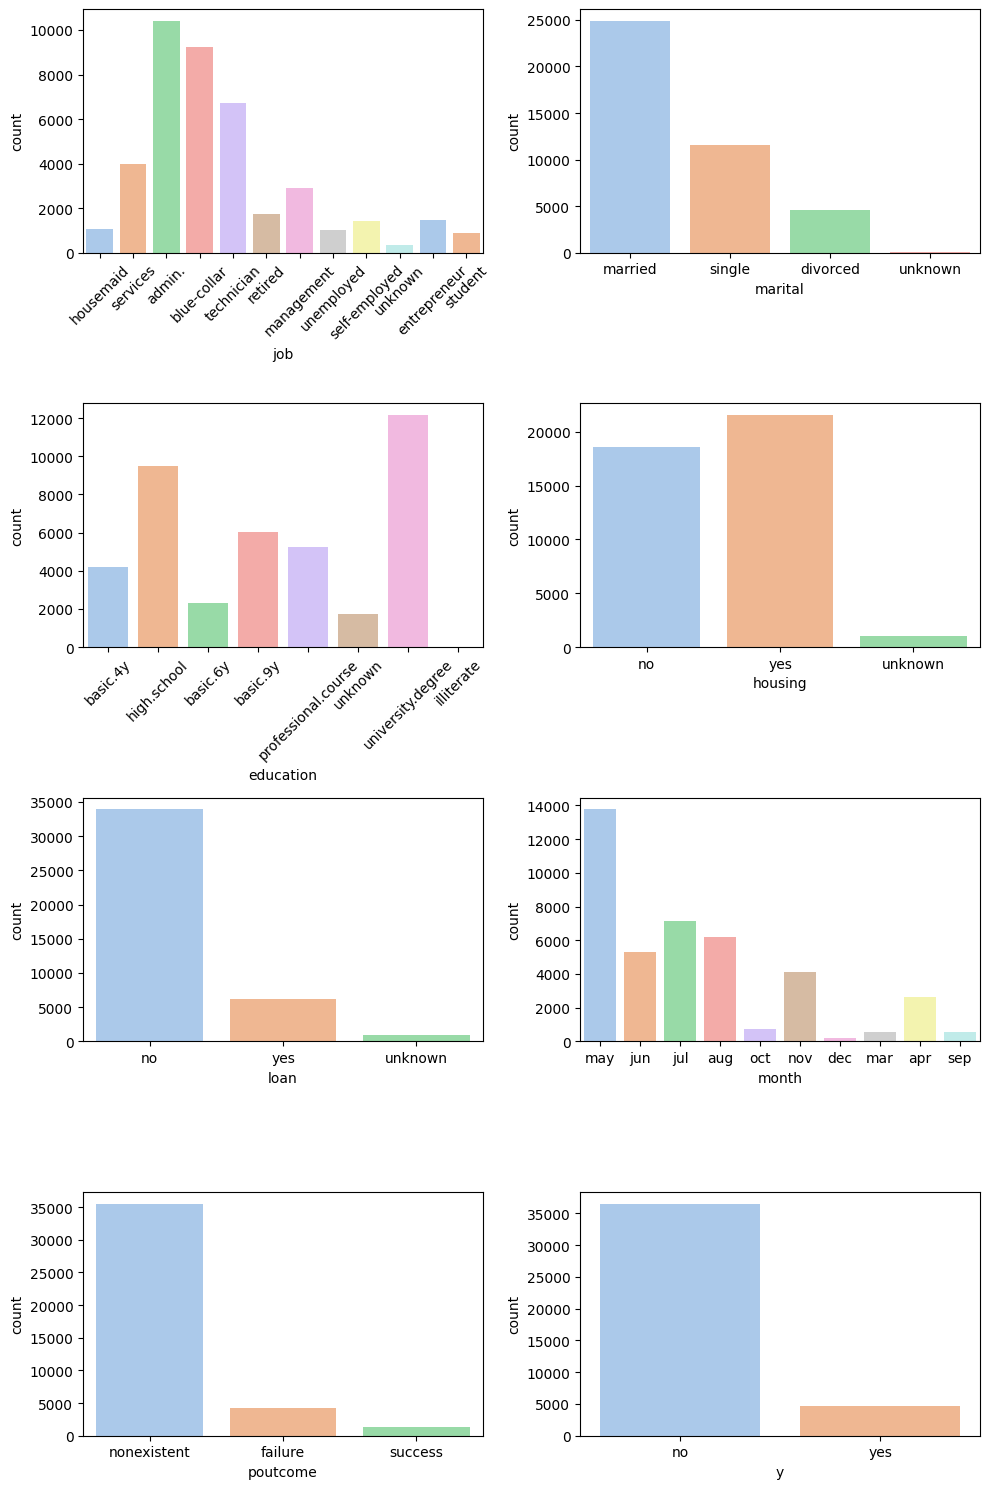

In [8]:
fig, axis = plt.subplots(4, 2, figsize = (10, 15))

sns.countplot(ax = axis[0, 0], data = df_unico, x = "job", palette='pastel', hue= "job", legend=False)
axis[0, 0].tick_params(axis='x', rotation=45)

sns.countplot(ax = axis[0, 1], data = df_unico, x = "marital", palette='pastel', hue= "marital", legend=False)

sns.countplot(ax = axis[1, 0], data = df_unico, x = "education", palette='pastel', hue= "education", legend=False)
axis[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(ax = axis[1, 1], data = df_unico, x = "housing", palette='pastel', hue= "housing", legend=False)

sns.countplot(ax = axis[2, 0], data = df_unico, x = "loan", palette='pastel', hue= "loan", legend=False)

sns.countplot(ax = axis[2, 1], data = df_unico, x = "month", palette='pastel', hue= "month", legend=False)

sns.countplot(ax = axis[3, 0], data = df_unico, x = "poutcome", palette='pastel', hue= "poutcome", legend=False)

sns.countplot(ax = axis[3, 1], data = df_unico, x = "y", palette='pastel', hue= "y", legend=False)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

**ANALISIS GRAFICO DE VARIABLES CATEGORICAS**
- `job` : La mayoría de los empleos de los clientes suelen distribuirse entre servicios, administrativos, técnicos y obreros, siendo los menos frecuentes amas de casa, desempleados y estudiantes.
- `marital` : El estado civil de los clientes es mayoritariamente casados, con menor fecuencia de divorciados y solteros.
- `education` : El dato con mayor frecuencia es enseñanza universitaria, habiendo alta presencia tambien entre high school, cursos pofesionales y enseñanza básica 9 años, lo cual puede indicar que la mayoría de los clientes presentan entre alto y medio grado de enseñanza. Los no letrados casi son nulos respecto al resto.
- `housing` : Los clientes en cuanto a préstamos de vivienda están distribuidos casi en un 55 % - 45 %, siendo algo mayor los que sí tienen dicho préstamo.
- `loan` : Mayoría de clientes que no cuentan con préstamos personales
- `month` : La mayoría de los contactos con clientes se reparten entre los meses de mayo a agosto, habiendo algunos en los que prácticamente no se contactó, estos datos pueden deberse a algo puntual en la compañía o a una campaña más agresiva realizada en esos meses, este dato es candidato a ser eliminado más adelante salvo que guarde gran correlación con la variable objetivo del análisis.
- `poutcome` : En cuanto al resultado de la campaña de marketing anterior la gran mayoría de datos revelan que no hubo campaña anterior a estos clientes salvo unos 5000 clientes aprox. de los cuales 2 terceras partes no contrataron.
- `y` : El resultado de la campaña de marketing a estos clientes dio como resultado que más de un 85 % de los clientes no contrataron.

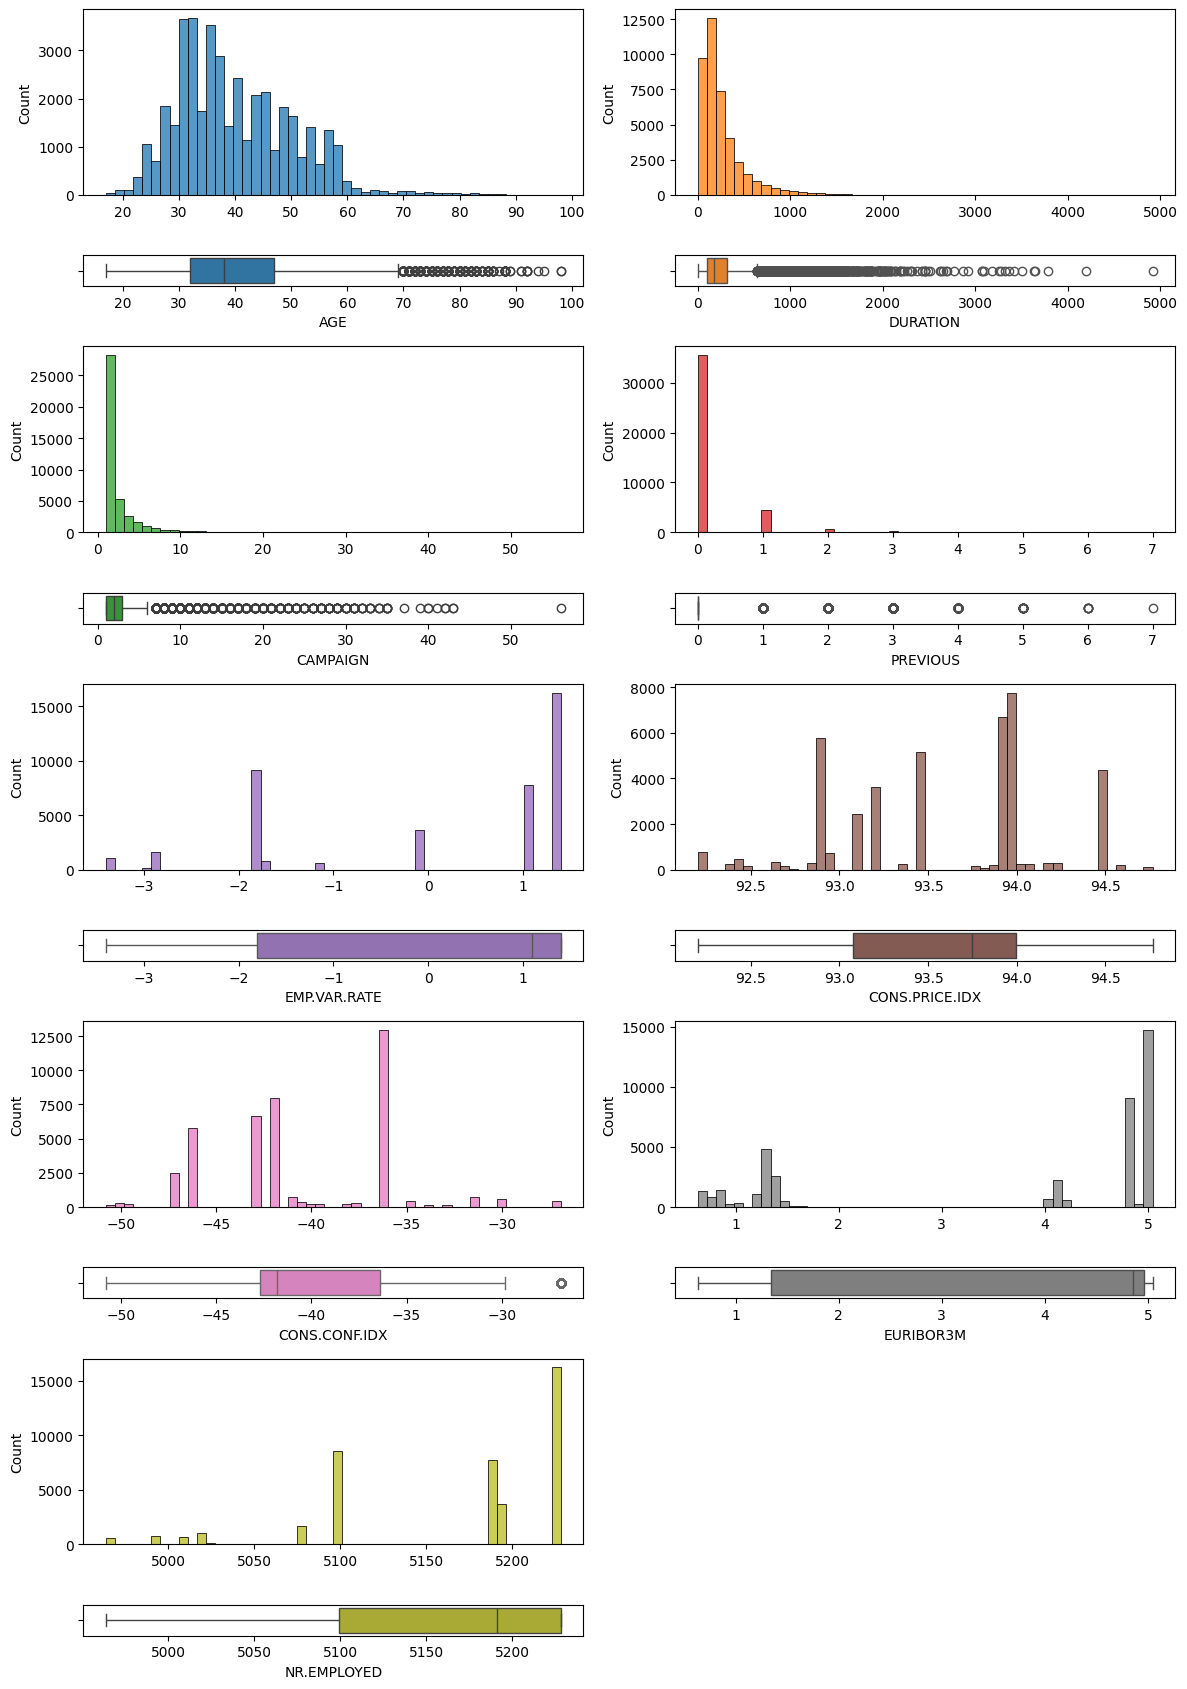

In [9]:
# ANALISIS DE VARIABLES NUMERICAS
# ["age", "duration", "campaign", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
fig, axis = plt.subplots(10, 2, figsize = (12, 17), gridspec_kw={'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
# age
sns.histplot(ax = axis[0, 0], data = df_unico, x = "age", bins=50, color="#1f77b4").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df_unico, x = "age", color="#1f77b4").set(xlabel = "AGE")

# duration
sns.histplot(ax = axis[0, 1], data = df_unico, x = "duration", bins=50, color="#ff7f0e").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = df_unico, x = "duration", color="#ff7f0e").set(xlabel = "DURATION")

# campaign
sns.histplot(ax = axis[2, 0], data = df_unico, x = "campaign", bins=50, color="#2ca02c").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df_unico, x = "campaign", color="#2ca02c").set(xlabel = "CAMPAIGN")

# previous
sns.histplot(ax = axis[2, 1], data = df_unico, x = "previous", bins=50, color="#d62728").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = df_unico, x = "previous", color="#d62728").set(xlabel = "PREVIOUS")

# emp.var.rate
sns.histplot(ax = axis[4, 0], data = df_unico, x = "emp.var.rate", bins=50, color="#9467bd").set(xlabel = None)
sns.boxplot(ax = axis[5, 0], data = df_unico, x = "emp.var.rate", color="#9467bd").set(xlabel = "EMP.VAR.RATE")

# cons.price.idx
sns.histplot(ax = axis[4, 1], data = df_unico, x = "cons.price.idx", bins=50, color="#8c564b").set(xlabel = None)
sns.boxplot(ax = axis[5, 1], data = df_unico, x = "cons.price.idx", color="#8c564b").set(xlabel = "CONS.PRICE.IDX")

# cons.conf.idx
sns.histplot(ax = axis[6, 0], data = df_unico, x = "cons.conf.idx", bins=50, color="#e377c2").set(xlabel = None)
sns.boxplot(ax = axis[7, 0], data = df_unico, x = "cons.conf.idx", color="#e377c2").set(xlabel = "CONS.CONF.IDX")

# euribor3m
sns.histplot(ax = axis[6, 1], data = df_unico, x = "euribor3m", bins=50, color="#7f7f7f").set(xlabel = None)
sns.boxplot(ax = axis[7, 1], data = df_unico, x = "euribor3m", color="#7f7f7f").set(xlabel = "EURIBOR3M")

# nr.employed
sns.histplot(ax = axis[8, 0], data = df_unico, x = "nr.employed", bins=50, color="#bcbd22").set(xlabel = None)
sns.boxplot(ax = axis[9, 0], data = df_unico, x = "nr.employed", color="#bcbd22").set(xlabel = "NR.EMPLOYED")

axis[8, 1].axis("off")
axis[9, 1].axis("off")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

**ANÁLISIS GRÁFICO DE VARIABLES NUMÉRICAS**
- `age` : Concentración de la mayoría de edades de los clientes entre 25 y 60 años aprox. considerando valores atípicos edades de clientes entre 70 y cerca de 100 años.
- `duration` : Los datos de duración del contacto pevio con los clientes se concentran entre 0 y 500 segundos, habiendo llamadas extremadamente largas que pueden llegar hasta casi dos horas, habrá que considerar si estos datos van relacionados con clientes que luego aceptaron contratar o se puede tratar de errores al introducir los datos.
- `campaign` : Entre 0 y 5 contactos es donde está la mayoría de clientes en esta campaña, habiendo algunos que han tenido más de 40 llamadas.
- `previous` : En un porcentaje muy alto la mayoría de los clientes no fueron contactados en campañas realizadas con anterioridad, este dato habrá que analizarlo posteriormente para buscar su relación con el target o se considerará para su eliminación.
- `emp.var.rate` : Un alto porcentaje de clientes fueron contactados en condiciones de tasa de variación de empleo positiva, lo cual indica condiciones de crecimiento económico. No es muy alta la tasa, como tampoco lo es la de valores negativos así que habrá que evaluar su correlación con el target.
- `cons.price.idx` : Gráfico con picos altos en ciertos valores, lo que podría indicar que este valor se mantuvo relativamente constante en un rango. Valorar su impacto en el target para mantenerla o no.
- `cons.conf.idx` : Esta variable mide el optimismo o pesismismo de los consumidores, pudiendo resultar muy útil al análisis, gráficamente se mueve sin prácticamente valores atípicos entre -50 y 30.
- `euribor3m` : Gran concentración cerca del valor 5, al ser una variable indicadora de los intereses puede tener gran valor predictivo.
- `nr.employed` : Se concentra entre valores fijos cercanos a 5100, 5200 y 5250.

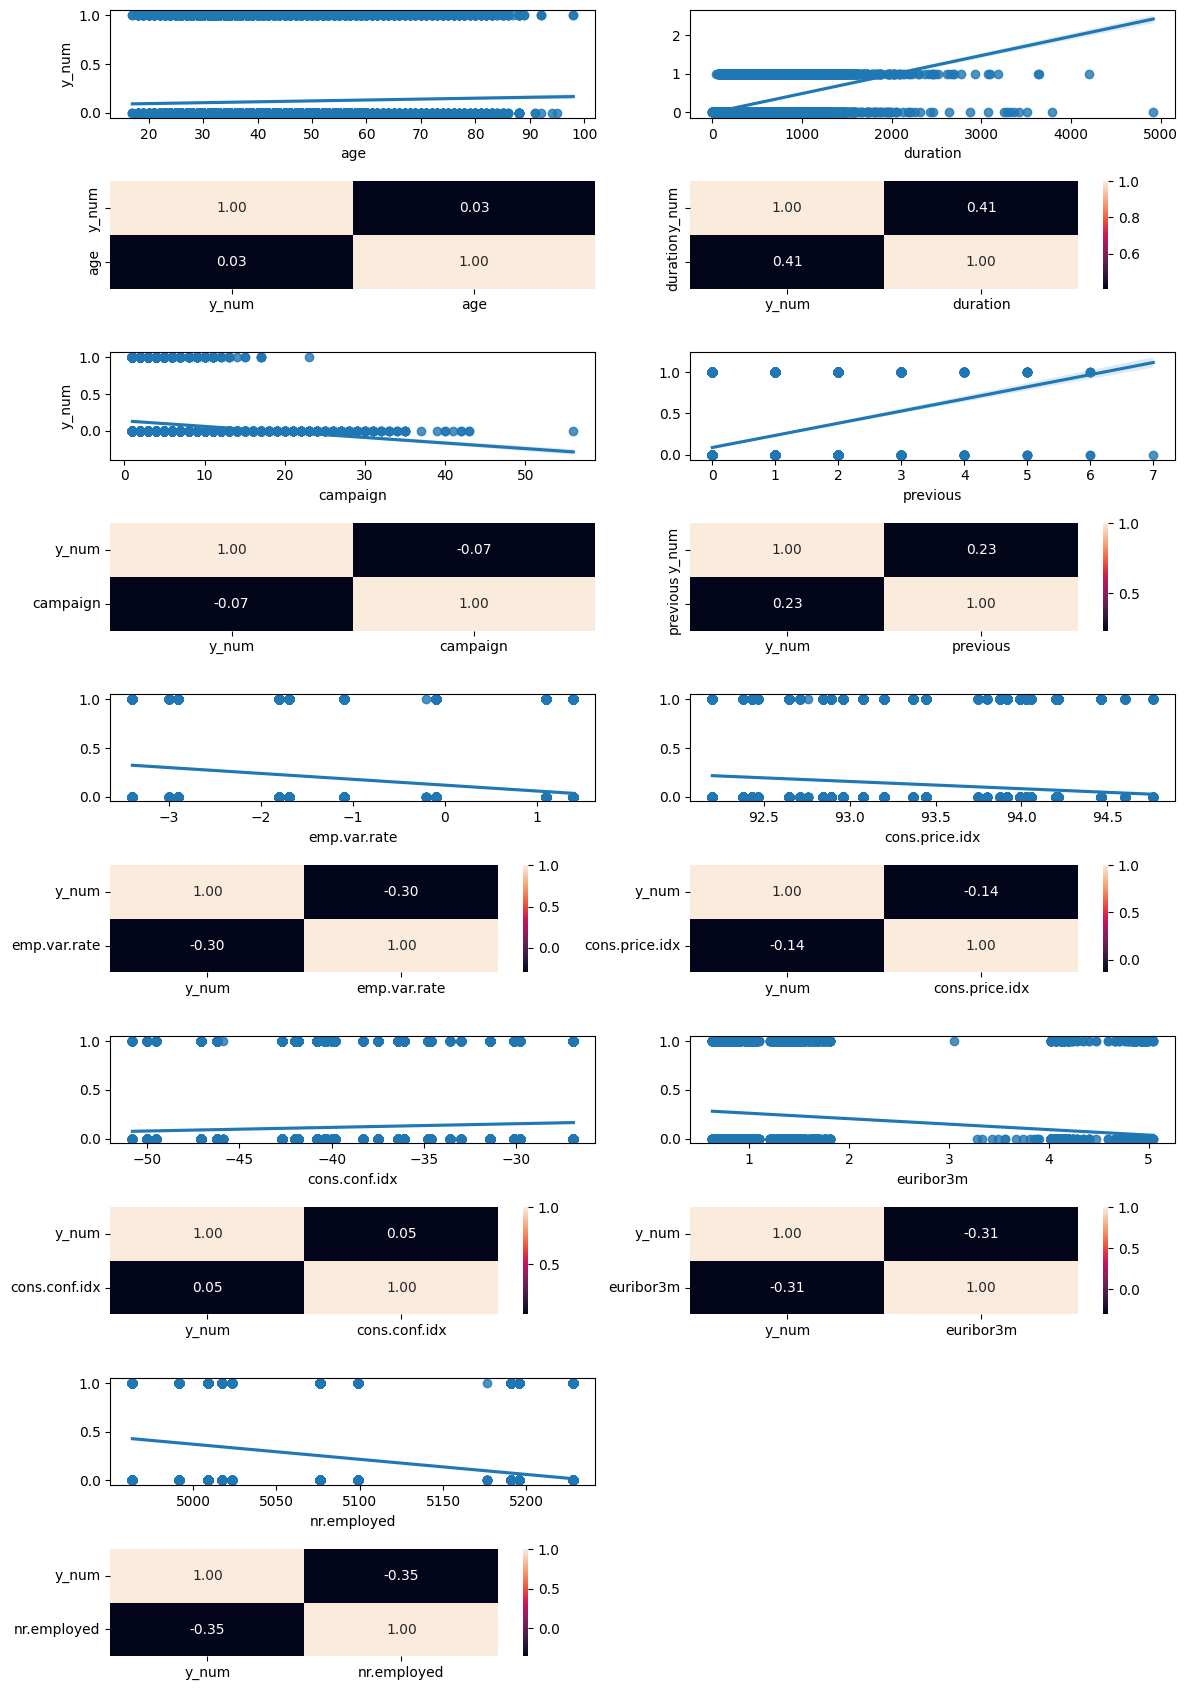

In [10]:
# ANÁLISIS NUMÉRICO - NUMÉRICO BUSCANDO CORRELACIONES ENTRE VARIABLES BUSCANDO RELACIÓN CON MI VARIABLE OBJETIVO "y"
# Para ello convierto mi variable y a numérica
df_unico["y_num"] = pd.factorize(df_unico["y"])[0]
fig, axis = plt.subplots(10, 2, figsize = (12, 17))
# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df_unico, x = "age", y = "y_num")
sns.heatmap(df_unico[["y_num", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df_unico, x = "duration", y = "y_num").set(ylabel=None)
sns.heatmap(df_unico[["y_num", "duration"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df_unico, x = "campaign", y = "y_num")
sns.heatmap(df_unico[["y_num", "campaign"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2, 1], data = df_unico, x = "previous", y = "y_num").set(ylabel=None)
sns.heatmap(df_unico[["y_num", "previous"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

sns.regplot(ax = axis[4, 0], data = df_unico, x = "emp.var.rate", y = "y_num").set(ylabel=None)
sns.heatmap(df_unico[["y_num", "emp.var.rate"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 0])

sns.regplot(ax = axis[4, 1], data = df_unico, x = "cons.price.idx", y = "y_num").set(ylabel=None)
sns.heatmap(df_unico[["y_num", "cons.price.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 1])

sns.regplot(ax = axis[6, 0], data = df_unico, x = "cons.conf.idx", y = "y_num").set(ylabel=None)
sns.heatmap(df_unico[["y_num", "cons.conf.idx"]].corr(), annot = True, fmt = ".2f", ax = axis[7, 0])

sns.regplot(ax = axis[6, 1], data = df_unico, x = "euribor3m", y = "y_num").set(ylabel=None)
sns.heatmap(df_unico[["y_num", "euribor3m"]].corr(), annot = True, fmt = ".2f", ax = axis[7, 1])

sns.regplot(ax = axis[8, 0], data = df_unico, x = "nr.employed", y = "y_num").set(ylabel=None)
sns.heatmap(df_unico[["y_num", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[9, 0])

axis[8, 1].axis("off")
axis[9, 1].axis("off")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

**RESUMEN DE ANÁLISIS NUMÉRICO - NUMÉRICO**
Encontramos 5 variables numéricas con una correlación moderada con la variable target:  
- `duration`, `previous`, `emp.var.rate`, `euribor3m` y `nr.employed`  
En algunos casos la correlación es positiva, indicador de que al aumentar el valor de la variable es más probable que y=1 (cliente contrata) y en otros casos a la inversa.  
Las variables `age`, `campaign`, `cons.price.idx` y `cons.conf.idx` parecen estar poco relacionadas con el comportamiento del target.

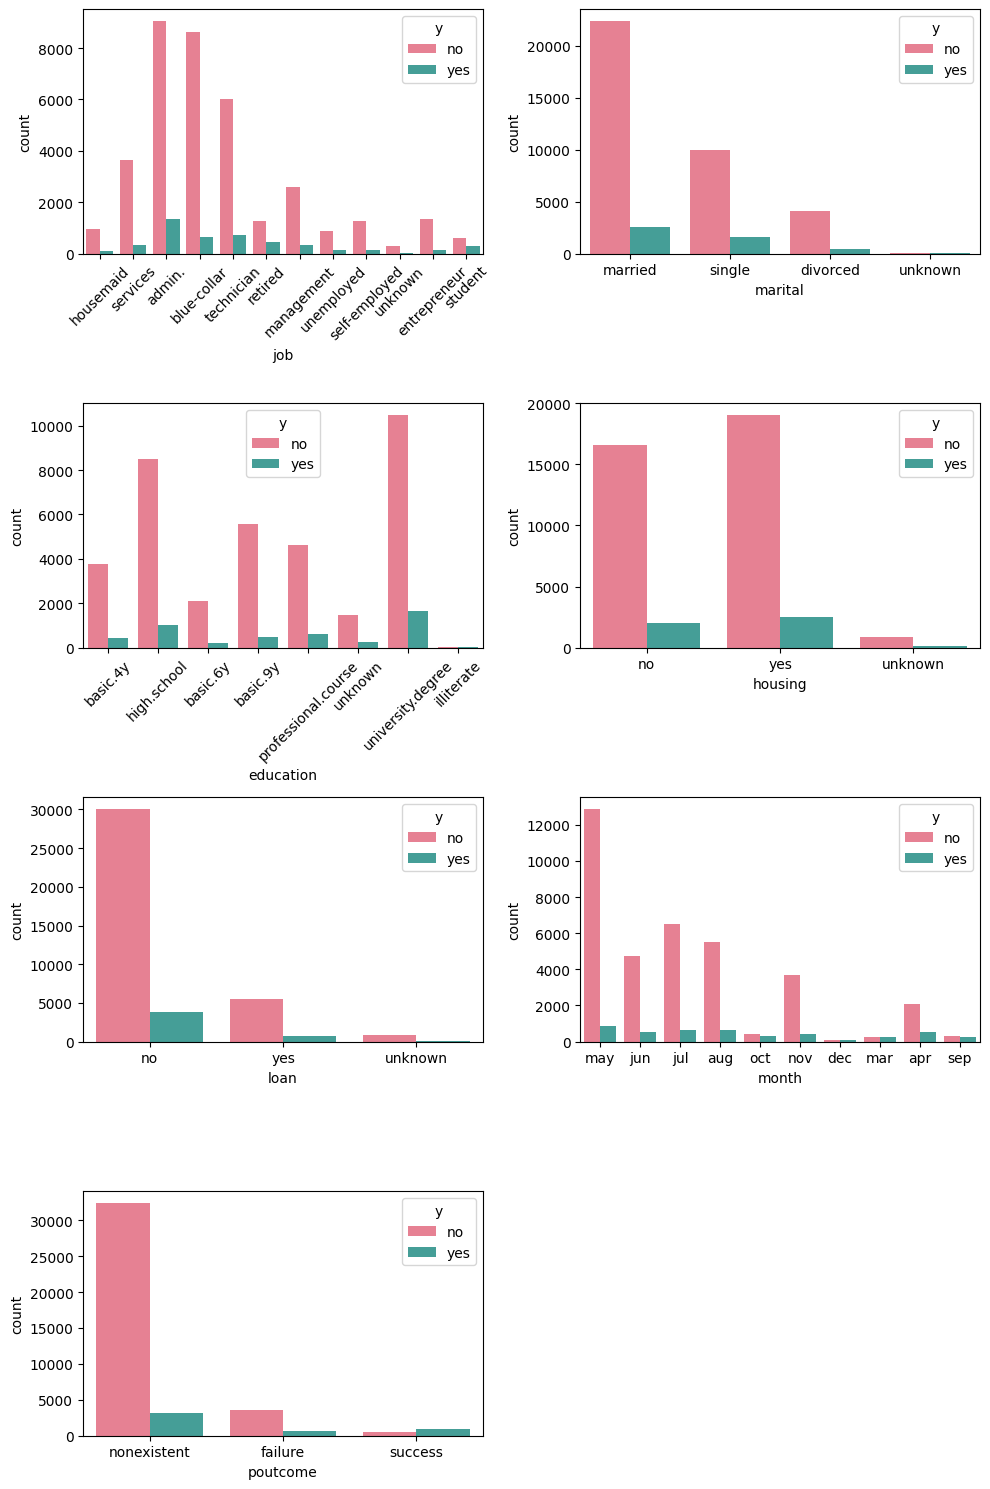

In [11]:
# ANÁLISIS CATEGÓRICO - CATEGÓRICO
# ["job", "marital", "education", "housing", "loan", "month", "poutcome", "y"]
fig, axis = plt.subplots(4, 2, figsize = (10, 15))

sns.countplot(ax = axis[0, 0], data = df_unico, x = "job", palette='husl', hue= "y", legend=True)
axis[0, 0].tick_params(axis='x', rotation=45)

sns.countplot(ax = axis[0, 1], data = df_unico, x = "marital", palette='husl', hue= "y", legend=True)

sns.countplot(ax = axis[1, 0], data = df_unico, x = "education", palette='husl', hue= "y", legend=True)
axis[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(ax = axis[1, 1], data = df_unico, x = "housing", palette='husl', hue= "y", legend=True)

sns.countplot(ax = axis[2, 0], data = df_unico, x = "loan", palette='husl', hue= "y", legend=True)

sns.countplot(ax = axis[2, 1], data = df_unico, x = "month", palette='husl', hue= "y", legend=True)

sns.countplot(ax = axis[3, 0], data = df_unico, x = "poutcome", palette='husl', hue= "y", legend=True)

axis[3, 1].axis("off")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Del análisis gráfico anterior podemos ver que el porcentaje de clientes que contratan y los que no, se mantiene bastante similar al dividirlo en categorías que en su distribución total. Se puede ver sin embargo algunos patrones como por ejemplo:  
- personas retiradas laboralmente contratan algo más en proporción que el resto
- personas solteras contratan algo menos que los casados pero en proporción al número total es mayor su porcentaje
- son algo menos los cientes sin préstamo para vivienda concedido pero suelen contratar en mayor proporción

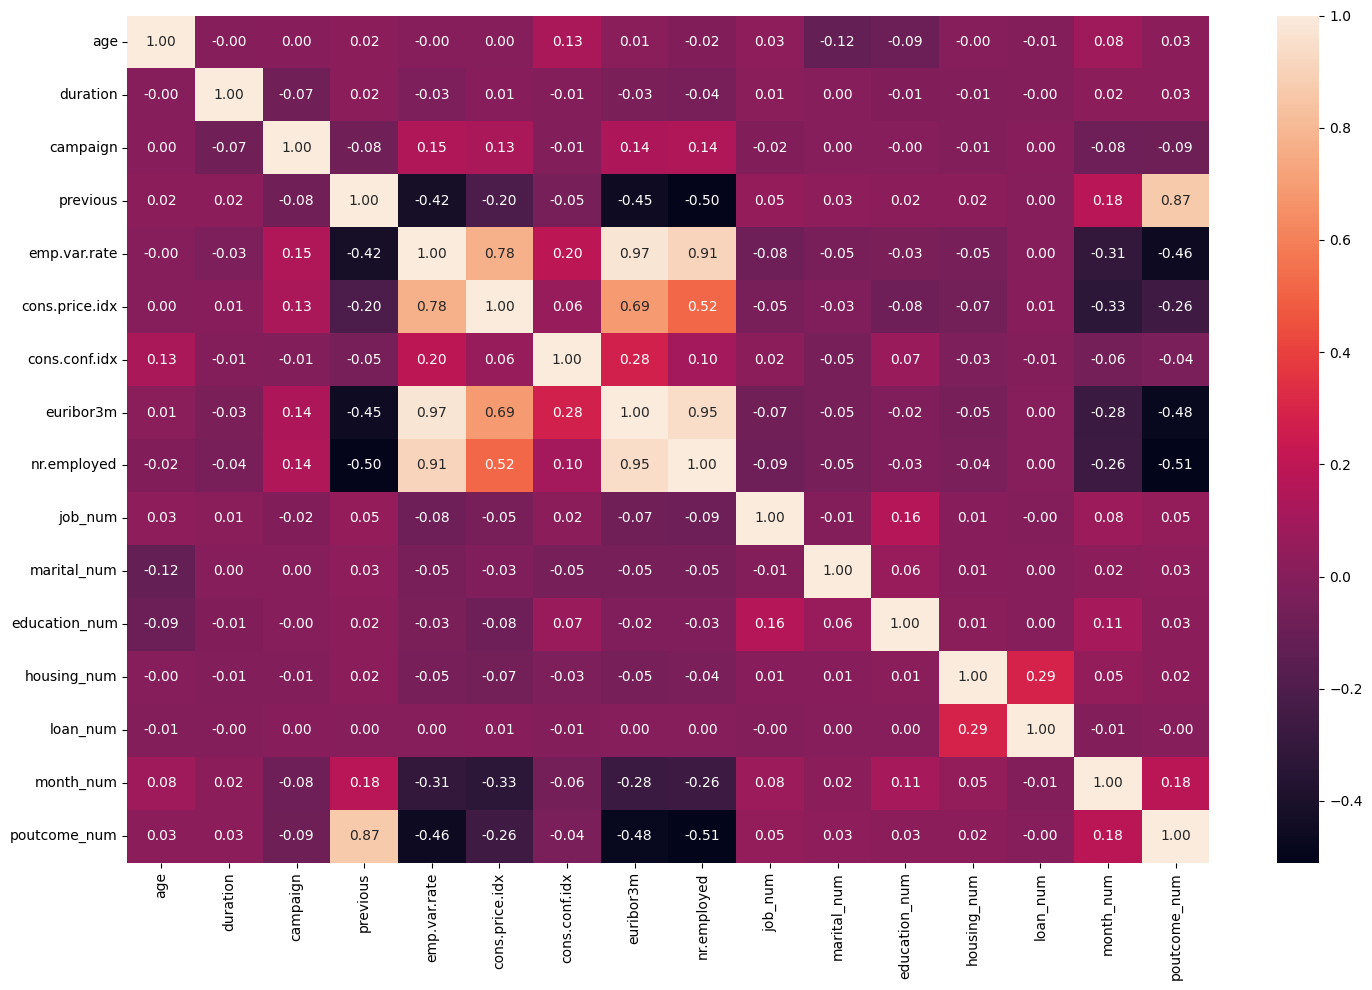

In [12]:
# ANÁLISIS NUMÉRICO - CATEGÓRICO COMPLETO
# Variables numéricas
# ["age", "duration", "campaign", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
# Codificando las variables categóricas a números enteros para su procesamiento
# ["job", "marital", "education", "housing", "loan", "month", "poutcome", "y"]
df_unico["job_num"] = pd.factorize(df_unico["job"])[0]
df_unico["marital_num"] = pd.factorize(df_unico["marital"])[0]
df_unico["education_num"] = pd.factorize(df_unico["education"])[0]
df_unico["housing_num"] = pd.factorize(df_unico["housing"])[0]
df_unico["loan_num"] = pd.factorize(df_unico["loan"])[0]
df_unico["month_num"] = pd.factorize(df_unico["month"])[0]
df_unico["poutcome_num"] = pd.factorize(df_unico["poutcome"])[0]

fig, axis = plt.subplots(figsize = (15, 10))

sns.heatmap(df_unico[["age", "duration", "campaign", "previous", "emp.var.rate",
                    "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "job_num", "marital_num", "education_num",
                     "housing_num",  "loan_num", "month_num", "poutcome_num"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

**CONCLUSIONES**  

Con y: Las correlaciones más importantes son con duration (0.41), nr.employed (-0.35), euribor3m (-0.31), y emp.var.rate (-0.30). Estas variables tienen una influencia moderada en y.

Entre variables económicas: emp.var.rate, euribor3m, nr.employed, y cons.price.idx están muy correlacionadas (0.52 a 0.97), indicando que reflejan condiciones económicas generales.

Con previous y poutcome: Estas variables tienen correlaciones moderadas a fuertes con las condiciones económicas y entre sí (por ejemplo, previous vs poutcome: 0.87).



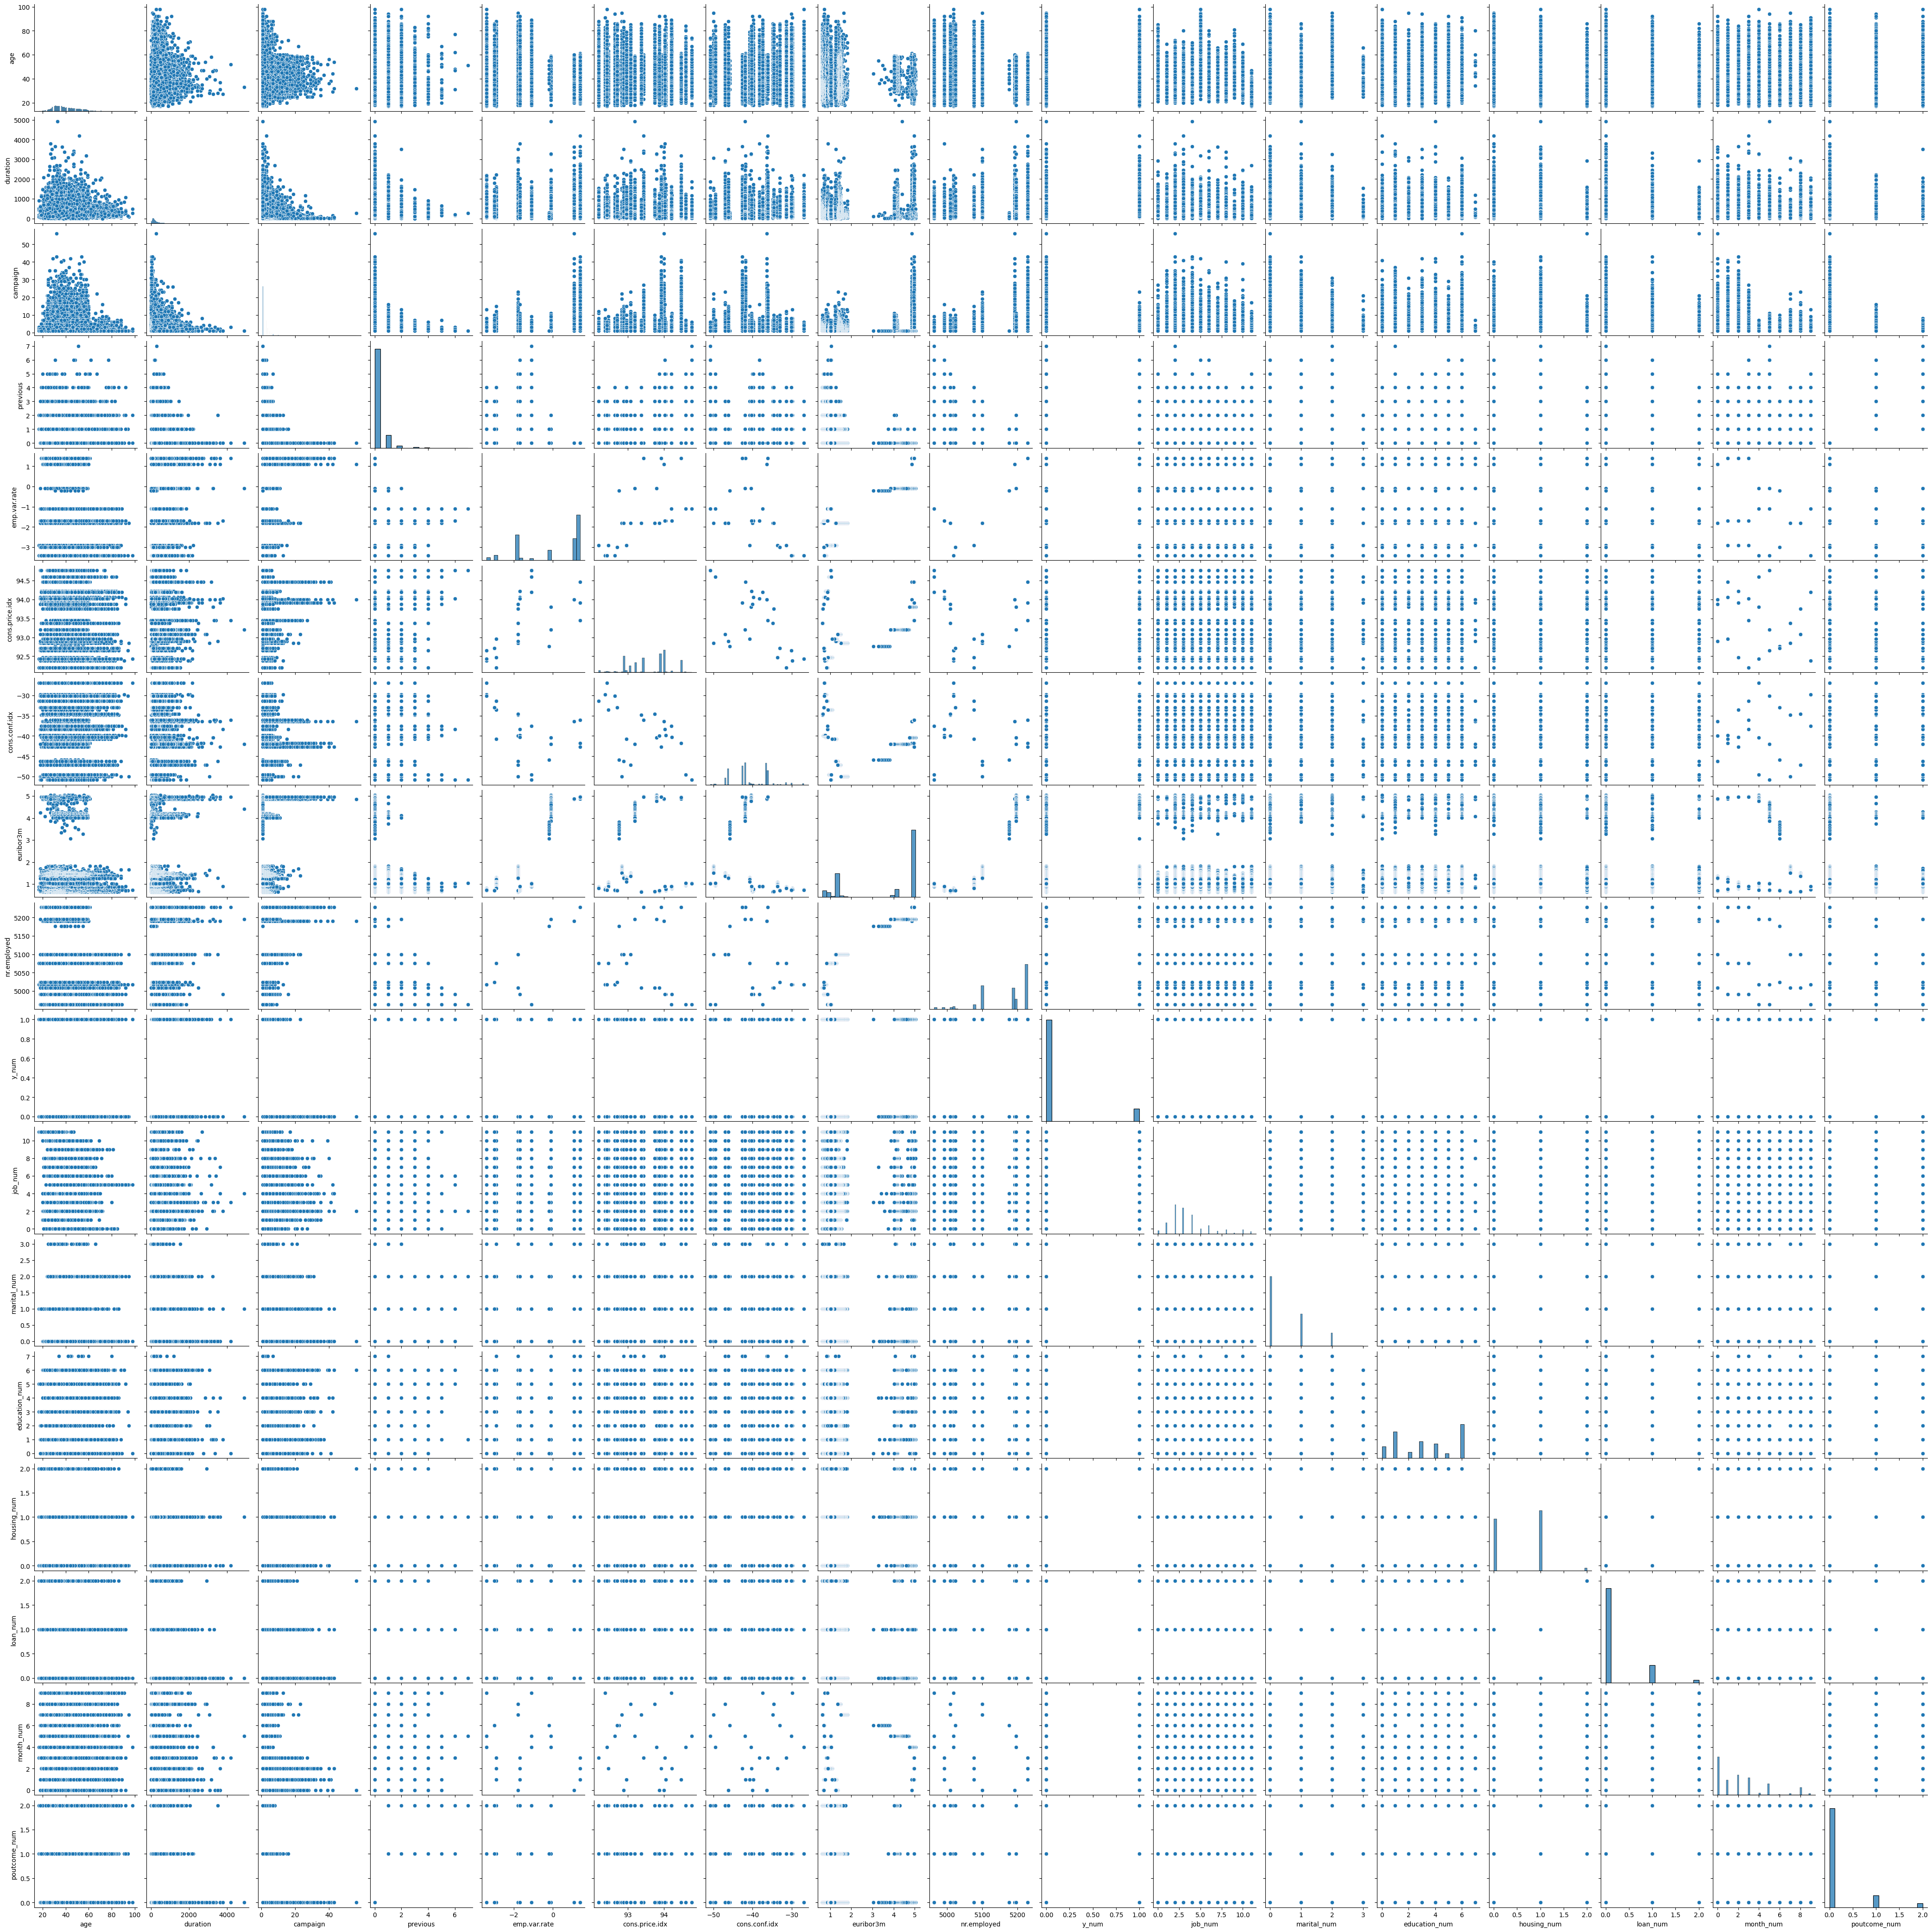

In [13]:
# RELACIONES TODOS CON TODOS
sns.pairplot(data = df_unico)
plt.show()

In [14]:
# LIMPIEZA DE VALORES ATÍPICOS
# Variables numéricas
# ["age", "duration", "campaign", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
out_age = df_unico[df_unico["age"] > 90]["y"].value_counts() # 10 datos 5 clientes contrataron
df_unico = df_unico[df_unico["age"] <= 90]
# Se decide eliminar los valores donde edad > 90 años por no ser cantidad relevante y poder deberse a ruido o errores
out_duration = df_unico[df_unico["duration"] > 2500]["y"].value_counts() # 24 datos 13 clientes contrataron
df_unico = df_unico[df_unico["duration"] <= 2500]
# Se decide eliminar los valores donde la llamada es de más de 2500 segundos por ser atípicas
out_campaign = df_unico[df_unico["campaign"] > 20]["y"].value_counts() # 157 datos 1 cliente contrato
df_unico = df_unico[df_unico["campaign"] <= 20]
# Se decide eliminar los valores donde se realizaron mas de 20 contactos al cliente por no aportar mucho al modelo
out_previous = df_unico[df_unico["previous"] > 5]["y"].value_counts() # 94 datos 54 clientes contrataron
df_unico = df_unico[df_unico["previous"] <= 5]
# Se decide eliminar los valores donde se contacto al cliente más de 5 veces en la campaña anterior
# El resto de variables numéricas de carácter indicativo económico se mantienen tal cual por no presentar valores atípicos significativos
df_unico.head()

,age,job,marital,education,housing,loan,month,duration,campaign,previous,...,nr.employed,y,y_num,job_num,marital_num,education_num,housing_num,loan_num,month_num,poutcome_num
0,56,housemaid,married,basic.4y,no,no,may,261,1,0,...,5191.0,no,0,0,0,0,0,0,0,0
1,57,services,married,high.school,no,no,may,149,1,0,...,5191.0,no,0,1,0,1,0,0,0,0
2,37,services,married,high.school,yes,no,may,226,1,0,...,5191.0,no,0,1,0,1,1,0,0,0
3,40,admin.,married,basic.6y,no,no,may,151,1,0,...,5191.0,no,0,2,0,2,0,0,0,0
4,56,services,married,high.school,no,yes,may,307,1,0,...,5191.0,no,0,1,0,1,0,1,0,0


In [15]:
# TRATAMIENTO DE VALORES FALTANTES
df_unico.isnull().sum().sort_values(ascending=False)
# El dataset en este punto no presenta valores faltantes

age               0
job               0
marital           0
education         0
housing           0
loan              0
month             0
duration          0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
y_num             0
job_num           0
marital_num       0
education_num     0
housing_num       0
loan_num          0
month_num         0
poutcome_num      0
dtype: int64

In [16]:
# CODIFICACION Y ESCALAMIENTO
# Decido separar mis datos en train y test antes de codificar o hacer alguna otra transformacion
# Luego aplicare de igual manera los metodos a ambos dataframes
from sklearn.model_selection import train_test_split

df_clean = df_unico.drop(["job", "marital", "education", "housing", "loan", "month", "poutcome", "y"], axis=1)

X = df_clean.drop("y_num", axis = 1)
y = df_clean["y_num"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
# Escalado
from sklearn.preprocessing import MinMaxScaler

# instancio el escalador
scaler = MinMaxScaler()

# entreno el escalador con los datos de entrenamiento
scaler.fit(X_train)

# aplico el escalador en ambos
X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = X_train.columns)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = X_test.columns)

X_train_scal.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_num,marital_num,education_num,housing_num,loan_num,month_num,poutcome_num
34772,0.166667,0.018906,0.157895,0.0,0.333333,0.269680,0.192469,0.143278,0.512287,0.272727,0.000000,0.428571,0.0,0.0,0.000000,0.0
37995,0.361111,0.117860,0.000000,0.0,0.000000,0.069369,0.878661,0.034913,0.203781,0.363636,0.000000,0.571429,0.0,0.0,1.000000,0.0
30187,0.194444,0.283990,0.000000,0.2,0.333333,0.340608,0.154812,0.165722,0.512287,0.181818,0.333333,0.142857,0.0,0.0,0.888889,0.5
3244,0.180556,0.070796,0.631579,0.0,0.937500,0.698753,0.602510,0.958059,0.859735,0.545455,0.333333,0.857143,1.0,1.0,0.000000,0.0
27661,0.347222,0.004023,0.105263,0.0,0.687500,0.389322,0.368201,0.767853,0.877883,0.181818,0.666667,0.857143,0.5,0.0,0.555556,0.0


In [18]:
from sklearn.feature_selection import chi2, SelectKBest

selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_scal), columns = X_train_scal.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scal), columns = X_test_scal.columns.values[ix])

X_train_sel.head()

,duration,previous,emp.var.rate,euribor3m,poutcome_num
0,0.018906,0.0,0.333333,0.143278,0.0
1,0.117860,0.0,0.000000,0.034913,0.0
2,0.283990,0.2,0.333333,0.165722,0.5
3,0.070796,0.0,0.937500,0.958059,0.0
4,0.004023,0.0,0.687500,0.767853,0.0


In [19]:
# modelado
from sklearn.linear_model import LogisticRegression

# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# optimizacion
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [20]:
# genera el modelo
model = LogisticRegression()

# entrna
model.fit(X_train_sel, y_train)

LogisticRegression()

In [21]:
# prediccion
y_pred = model.predict(X_test_sel)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(8196,))

In [22]:
accuracy_score(y_test, y_pred)

0.9021473889702294

In [23]:
y_pred_train = model.predict(X_train_sel)

accuracy_score(y_train, y_pred_train)

0.9003751944605436

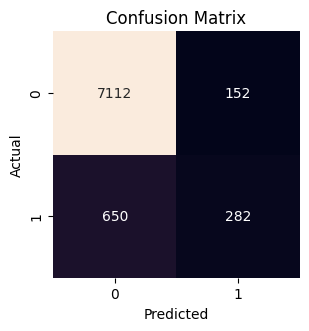

In [24]:
contrata = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(contrata)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**OPTIMIZACION DE PARAMETROS**

In [25]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# genera el modelo
model = LogisticRegression()

# Definimos los parámetros que queremos ajustar a mano
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la cuadrícula
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [26]:
grid.fit(X_train_sel, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [27]:
model_grid = LogisticRegression(penalty = "l1", C = 1, solver = "liblinear")
model_grid.fit(X_train_sel, y_train)
y_pred = model_grid.predict(X_test_sel)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.9020253782332845

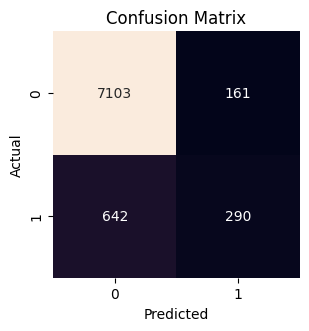

In [28]:
contrata = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(contrata)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()